In [1]:
from math import exp, factorial
from itertools import accumulate
from bisect import bisect
import random
import matplotlib.pyplot as plt

# Random Variates by Inverse CDF

Here we are going to generate random variates sampled from a distribution by using the cumulative distribution function (CDF). Just so that we aren't re-hashing something that is in a textbook, lets try something like Poisson variate generation. Poisson variates are drawn from:

$$
\text{PDF}(X = k) = \frac{e^{-\mu} \mu^{k}}{k!}.
$$

The CDF is:

$$
\text{CDF}(X = k) = e^{-\mu} \sum_{n = 0}^{k} \frac{\mu^n}{n!}.
$$

I'm not going to completely derive this here, but rather illustrate the steps. The CDF has a range of $[0, 1)$. So if you use a uniform random variate as the CDF, then solve for the $x$ value that would have produced that CDF, your distribution of $x$ would be the PDF of the target distribution. If your distribution has a very localized domain, this might work well, but if your distribution has _fat tails_ heading off to infinity, you might not get good performance out of this method.

Below, I'm assuming that $\mu$ is small, say, less than $1$:

In [2]:
def poisson_variate(mu, N=64):

    # Get a list of CDF values (sequence of partial sums of PDF).
    cdf = list(accumulate(exp(-mu)*mu**n/factorial(n) for n in range(10)))

    while True:
        u = random.random()
        yield bisect(cdf, u) - 1

Ok, let's test this thing. IT seems to work sort of okay for $\mu$ less than $4$ or so? Beyond that it visibly messes up the tail.

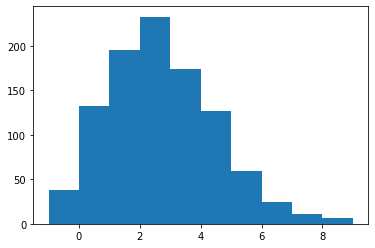

In [3]:
g = poisson_variate(3.3)
samples = [next(g) for i in range(1000)]
plt.hist(samples)
plt.show()

# Distributions Trivially Obtained by Inverse CDF

+ [Rayleigh Distribution](https://en.wikipedia.org/wiki/Poisson_distribution), circular-error probability, etc.
+ [Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
+ others?